<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-1-NLP/blob/master/Completed_bhav__Vector_Representations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

## 2) Use Spacy to tokenize / clean the listings 

In [0]:
nlp = spacy.load("en_core_web_lg")

In [0]:
df = pd.read_csv("job_listings.csv")

In [0]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [0]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [0]:
import bs4
from bs4 import BeautifulSoup

In [0]:
df['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text()).head()

0    b"Job Requirements:\nConceptual understanding ...
1    b'Job Description\n\nAs a Data Scientist 1, yo...
2    b'As a Data Scientist you will be working on c...
3    b'$4,969 - $6,756 a monthContractUnder the gen...
4    b'Location: USA \xe2\x80\x93 multiple location...
Name: description, dtype: object

In [0]:
df['cleaned_description'] = df['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [0]:
df.head()

,Unnamed: 0,description,title,cleaned_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [0]:
#Use Spacy to tokenize
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
STOP_WORDS = nlp.Defaults.stop_words


In [0]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_space == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
df['spacey_tokens'] = df['cleaned_description'].apply(get_lemmas)

In [0]:
df.head()

,Unnamed: 0,description,title,cleaned_description,spacey_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understand,..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'job, description\n\na, Data, Scientist, 1, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'as, Data, scientist, work, consult, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'location, USA, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
vect = CountVectorizer()
dtm = vect.fit_transform(df["cleaned_description"])

In [0]:
dtm.shape

(426, 10069)

In [0]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [0]:
# Get Word Counts for job descriptions
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [0]:
doc_len = [len(doc) for doc in df['cleaned_description']]

C:\Users\bhavn\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


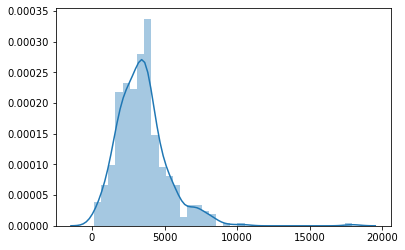

In [0]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf = TfidfVectorizer(stop_words = 'english',
                        # tokenizer = tokenize (we already tokenized into spacy lemmas)
                        ngram_range = (1,2),
                        min_df = 5, 
                        max_df = 0.6
                       )

In [0]:
tfid_dtm = tfidf.fit_transform(df["cleaned_description"])

In [0]:
tfid_dtm

<426x6332 sparse matrix of type '<class 'numpy.float64'>'
	with 116102 stored elements in Compressed Sparse Row format>

In [0]:
# Get feature names to use as dataframe column headers
tfid_dtm_df = pd.DataFrame(tfid_dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(tfid_dtm_df.shape)
tfid_dtm_df.head()

(426, 6332)


,000,000 employees,10,10 years,100,100 000,100 companies,100 countries,11,12,...,years industry,years professional,years related,years relevant,years work,years working,years xe2,yes,york,york city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [0]:
from sklearn.neighbors import NearestNeighbors

# Fit on tfid_dtm_df
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(tfid_dtm_df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [0]:
ideal_job = ["""

Looking for a data science job in biotechnology or pharmaceutical industry. 

"""]

In [0]:
new = tfidf.transform(ideal_job)

In [0]:
#apply new data to trained knn model
nn.kneighbors(new.todense())

(array([[1.33184826, 1.34710952, 1.3500864 , 1.35115417, 1.35559443]]),
 array([[340, 114, 291, 311,  82]], dtype=int64))

In [0]:
#Inspect most relevant result
df["cleaned_description"].iloc[340]

"b'POSITION OBJECTIVE: Provide efficient and effective programming solutions required for clinical pharmacology data analysis and reporting, including understanding clinical pharmacology components of study protocols, creation of more complex and integrated datasets, creation of graphs using more advanced programming skills, understanding and application of more advanced statistical tests, perform basic quality-checklist code reviews, develop standardized programs to automate routine tasks; and design, write and debug macro routines.\\n\\nThis position will be located in either our Buffalo, New York office or our Cranford, New Jersey office.\\n\\nEssential Job Functions/Responsibilities\\nProvide clinical pharmacology statistical representation on project and protocol teams.\\nParticipate in the protocol development process, including sample size calculations and the statistical analysis plan section of the protocol.\\nPerform bioequivalence (including food-effect, DDI, etc.) analysis 

In [0]:
df['cleaned_description'][340][:1000]

"b'POSITION OBJECTIVE: Provide efficient and effective programming solutions required for clinical pharmacology data analysis and reporting, including understanding clinical pharmacology components of study protocols, creation of more complex and integrated datasets, creation of graphs using more advanced programming skills, understanding and application of more advanced statistical tests, perform basic quality-checklist code reviews, develop standardized programs to automate routine tasks; and design, write and debug macro routines.\\n\\nThis position will be located in either our Buffalo, New York office or our Cranford, New Jersey office.\\n\\nEssential Job Functions/Responsibilities\\nProvide clinical pharmacology statistical representation on project and protocol teams.\\nParticipate in the protocol development process, including sample size calculations and the statistical analysis plan section of the protocol.\\nPerform bioequivalence (including food-effect, DDI, etc.) analysis 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 